In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim

In [2]:
import helper as hlp
import PCS_AE as ae

In [3]:
# Parameters
P = 1  # power
pcs_only = True

# Channel Parameters
chParam = hlp.AttrDict()
chParam.M = 16
chParam.SNR_db = np.array([0, 2, 4, 6, 8, 10])

# Auto-Encoder Parameters
aeParam = hlp.AttrDict()
# aeParam.temperature = 1
# aeParam.nLayersEnc = 1
# aeParam.nLayersDec = 2
# aeParam.nHiddenEnc = 128
# aeParam.nHiddenDec = 128
# aeParam.activation  = tf.nn.relu
# aeParam.dtype       = tf.float32
# aeParam.cpx_dtype   = tf.complex64

# Training Parameters
trainingParam = hlp.AttrDict()
# trainingParam.nBatches = 16
trainingParam.batchSize = 1000
trainingParam.learningRate = 0.001
trainingParam.iterations = 4001

## Helper Functions

In [4]:
def awgn(x, sigma2):
    noise_t = np.sqrt(sigma2)*torch.randn(x.shape)
    return torch.add(x, noise_t)

In [5]:
def normalization(x, P):
    c = torch.mean(x**2)
    return torch.sqrt(P / c) * x

In [6]:
def calculate_py_given_x(z, sig2):
    return (1 / (np.sqrt(2 * np.pi * sig2))) * np.exp(-z ** 2 / sig2 / 2)

In [7]:
# CE loss function and correct with additional term
def custom_loss_fn(ce, logit, ind, zhat, sig2):
    term_1 = ce(logit, ind)
    q = np.amax(nn.functional.softmax(logit, 1).detach().numpy(), 1)  # Q(c_i|Y_n) <-- learned
    p = np.multiply.reduce(calculate_py_given_x(zhat, sig2), 1)  # P(Y_n|c_i)
    term_2 = np.mean(p * np.log2(q))
    return term_1 + term_2

In [8]:
def complex2real(cplx):
    real = torch.flatten(cplx.real)
    imag = torch.flatten(cplx.imag)
    result = torch.transpose(torch.stack((real, imag)), 0, 1)
    return result

In [9]:
def real2complex(data):
    return data[...,0] + 1j * data[...,1]

In [10]:
def plot_2D_PDF(const, pmf):
    s = pmf * 3000
    plt.scatter(const.real, const.imag, s, c="r")
    plt.grid()
    plt.show()

In [11]:
# Initialize network
dist_generator = ae.DistGenerator(chParam.M)
mapper = ae.Mapper(chParam.M)
demap = ae.Demapper(chParam.M)
loss_fn = nn.CrossEntropyLoss()

## Training Loop

---SNR = 0 dB---
epoch 0: Loss = 6.0710 dB
epoch 500: Loss = 3.0510 dB
epoch 1000: Loss = 3.1096 dB
epoch 1500: Loss = 3.0271 dB
epoch 2000: Loss = 3.0660 dB
epoch 2500: Loss = 3.0867 dB
epoch 3000: Loss = 3.0230 dB
epoch 3500: Loss = 3.0707 dB
epoch 4000: Loss = 3.0389 dB
[0.0504691  0.07130388 0.07312488 0.0554989  0.06151908 0.06719899
 0.06819253 0.0595079  0.07448644 0.06979367 0.0486467  0.06265566
 0.06906635 0.06633333 0.04841647 0.05378614]
Prob sum should always be one:  0.99999994
Power should always be one: 1.0


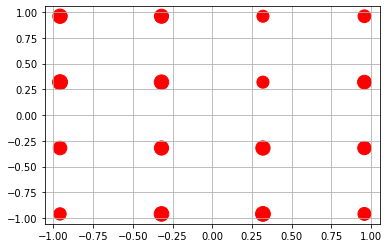

---SNR = 2 dB---
epoch 0: Loss = 2.6909 dB
epoch 500: Loss = 2.6809 dB
epoch 1000: Loss = 2.7181 dB
epoch 1500: Loss = 2.7077 dB
epoch 2000: Loss = 2.7885 dB
epoch 2500: Loss = 2.7281 dB
epoch 3000: Loss = 2.7130 dB
epoch 3500: Loss = 2.6537 dB
epoch 4000: Loss = 2.6459 dB
[0.0504691  0.07130388 0.07312488 0.0554989  0.06151908 0.06719899
 0.06819253 0.0595079  0.07448644 0.06979367 0.0486467  0.06265566
 0.06906635 0.06633333 0.04841647 0.05378614]
Prob sum should always be one:  0.99999994
Power should always be one: 1.0


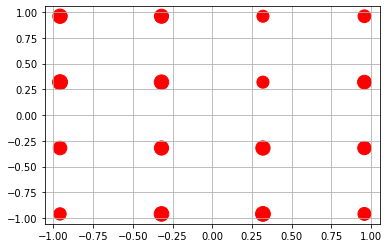

---SNR = 4 dB---
epoch 0: Loss = 2.2571 dB
epoch 500: Loss = 2.3358 dB
epoch 1000: Loss = 2.3146 dB
epoch 1500: Loss = 2.3494 dB
epoch 2000: Loss = 2.2595 dB
epoch 2500: Loss = 2.3309 dB
epoch 3000: Loss = 2.3767 dB
epoch 3500: Loss = 2.2872 dB
epoch 4000: Loss = 2.2920 dB
[0.0504691  0.07130388 0.07312488 0.0554989  0.06151908 0.06719899
 0.06819253 0.0595079  0.07448644 0.06979367 0.0486467  0.06265566
 0.06906635 0.06633333 0.04841647 0.05378614]
Prob sum should always be one:  0.99999994
Power should always be one: 1.0


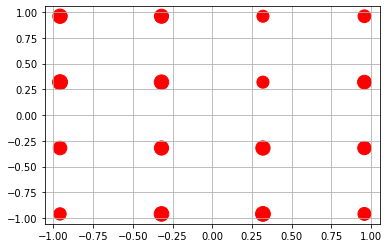

---SNR = 6 dB---
epoch 0: Loss = 1.7806 dB
epoch 500: Loss = 1.7706 dB
epoch 1000: Loss = 1.8713 dB
epoch 1500: Loss = 1.7825 dB
epoch 2000: Loss = 1.8951 dB
epoch 2500: Loss = 1.9134 dB
epoch 3000: Loss = 1.7435 dB
epoch 3500: Loss = 1.8274 dB
epoch 4000: Loss = 1.7156 dB
[0.0504691  0.07130388 0.07312488 0.0554989  0.06151908 0.06719899
 0.06819253 0.0595079  0.07448644 0.06979367 0.0486467  0.06265566
 0.06906635 0.06633333 0.04841647 0.05378614]
Prob sum should always be one:  0.99999994
Power should always be one: 1.0


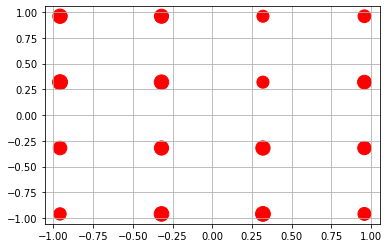

---SNR = 8 dB---
epoch 0: Loss = 1.0485 dB
epoch 500: Loss = 1.2480 dB
epoch 1000: Loss = 1.2921 dB
epoch 1500: Loss = 1.2762 dB
epoch 2000: Loss = 1.2765 dB
epoch 2500: Loss = 1.3754 dB
epoch 3000: Loss = 1.3898 dB
epoch 3500: Loss = 1.3280 dB
epoch 4000: Loss = 1.3746 dB
[0.0504691  0.07130388 0.07312488 0.0554989  0.06151908 0.06719899
 0.06819253 0.0595079  0.07448644 0.06979367 0.0486467  0.06265566
 0.06906635 0.06633333 0.04841647 0.05378614]
Prob sum should always be one:  0.99999994
Power should always be one: 1.0


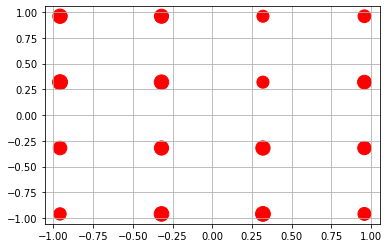

---SNR = 10 dB---
epoch 0: Loss = 0.6158 dB
epoch 500: Loss = 0.8850 dB
epoch 1000: Loss = 0.8275 dB
epoch 1500: Loss = 0.8230 dB
epoch 2000: Loss = 0.7960 dB
epoch 2500: Loss = 0.8656 dB
epoch 3000: Loss = 0.8295 dB
epoch 3500: Loss = 0.7984 dB
epoch 4000: Loss = 0.9880 dB
[0.0504691  0.07130388 0.07312488 0.0554989  0.06151908 0.06719899
 0.06819253 0.0595079  0.07448644 0.06979367 0.0486467  0.06265566
 0.06906635 0.06633333 0.04841647 0.05378614]
Prob sum should always be one:  0.99999994
Power should always be one: 1.0


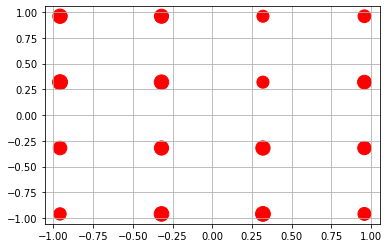

In [13]:
for (k, snr) in enumerate(hlp.db_to_lineal(chParam.SNR_db)):
    sigma2 = P / snr
    print(f'---SNR = {chParam.SNR_db[k]} dB---')

    # Optimizer
    if pcs_only:
        optimizer = optim.Adam(list(demap.parameters()) + list(dist_generator.parameters()),
                               lr=trainingParam.learningRate)
    else:
        optimizer = optim.Adam(list(mapper.parameters()) + list(demap.parameters()) + list(dist_generator.parameters()),
                               lr=trainingParam.learningRate)

    # Training loop
    for j in range(trainingParam.iterations):
        # first generate the distribution
        l_M = dist_generator(torch.ones(chParam.M)).reshape(-1, chParam.M)
        P_M = nn.functional.softmax(l_M, 1).detach().numpy()[0]

        # Sample indexes
        indices = hlp.sampler(P_M, trainingParam.batchSize)
        # get onehot from sampled indices
        onehot = np.array([hlp.one_hot(i, chParam.M) for i in indices])
        # convert array to tensors
        onehot_t = torch.tensor(onehot).float()
        indices_t = torch.tensor(indices)
        indices_t = indices_t.type(torch.LongTensor)  # labels

        # Get normalized constellation
        constellation = complex2real(torch.tensor(hlp.get_norm_qam(chParam.M, P, P_M)))

        # If PCS only then the matrix multiplication with the constellation is equivalent
        if (pcs_only):
            xhat = torch.matmul(onehot_t, constellation.float()).float()
        else:
            xhat = mapper(onehot_t)

        yhat = normalization(awgn(xhat, sigma2), P)

        l = demap(yhat)

        if True:
            zhat = (yhat - xhat).detach().numpy()
            loss = custom_loss_fn(loss_fn, l, indices_t, zhat, sigma2)
        else:
            loss = loss_fn(l, indices_t)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Printout and visualization
        if j % 500 == 0:
            print(f'epoch {j}: Loss = {loss.detach().numpy() / np.log(2) :.4f} dB')
        if loss < 1e-3:
            break
    # Data for the plots
    if pcs_only:
        L_M = dist_generator(torch.ones(chParam.M)).reshape(-1, chParam.M)
        PCS = nn.functional.softmax(L_M, 1).detach().numpy()[0]
        constellation = hlp.get_norm_qam(chParam.M, 1, PCS)
        print(PCS)
        print('Prob sum should always be one: ', np.sum(PCS))
        print('Power should always be one:', hlp.calculate_avg_power(constellation, PCS))
        plot_2D_PDF(constellation, PCS)
    else:
        a_plot = np.arange(chParam.M)
        onehot_plot = np.array([hlp.one_hot(a_plot[i], chParam.M) for i in range(chParam.M)])
        L_M = dist_generator(torch.ones(chParam.M)).reshape(-1, chParam.M)
        PCS = nn.functional.softmax(L_M, 1).detach().numpy()[0]
        learned_x = mapper(torch.tensor(onehot_plot).float())
        learned_x = normalization(learned_x, P).detach().numpy()
        print(PCS)
        print('Should always be one: ', np.sum(PCS))
        print('Power should be one:', hlp.calculate_avg_power(real2complex(learned_x), PCS))
        plt.scatter(learned_x[:,0], learned_x[:,1], PCS*3000)
        plt.title(f'Learned Constellation for SNR = {chParam.SNR_db[k]} dB')
        plt.grid()
        plt.show()